Laura Muñoz Hernández A01167497

Adriana Camarillo Durán A01551139

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import decomposition

Este es un dataset que tiene como objetivo determinar si una persona puede ser susceptible a crédito o no de acuerdo a un conjunto de variables

In [170]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [171]:
df = pd.read_csv(url)

In [172]:
df.shape

(30000, 25)

In [173]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [174]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [175]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [177]:
df_nulls = df.fillna(0)

In [178]:
df_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      30000 non-null  float64
 3   X3      30000 non-null  float64
 4   X4      30000 non-null  float64
 5   X5      30000 non-null  float64
 6   X6      30000 non-null  float64
 7   X7      30000 non-null  float64
 8   X8      30000 non-null  float64
 9   X9      30000 non-null  float64
 10  X10     30000 non-null  float64
 11  X11     30000 non-null  float64
 12  X12     30000 non-null  float64
 13  X13     30000 non-null  float64
 14  X14     30000 non-null  float64
 15  X15     30000 non-null  float64
 16  X16     30000 non-null  float64
 17  X17     30000 non-null  float64
 18  X18     30000 non-null  float64
 19  X19     30000 non-null  float64
 20  X20     30000 non-null  float64
 21  X21     30000 non-null  float64
 22

Primero nos enfocaremos en 2 variables que serían 

X4 : Marital Status
X5 : Age

<AxesSubplot:xlabel='X4', ylabel='X5'>

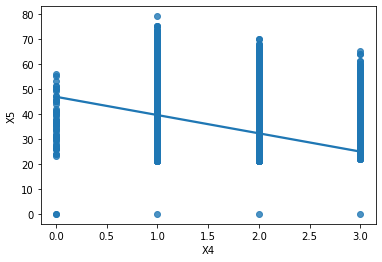

In [218]:
r = sns.regplot(data = df_nulls,  
                x = df_nulls.X4, 
                y = df_nulls.X5
               ) 
r

In [179]:
ndf = df_nulls[['X4', 'X5']]
ndf.corr()

,X4,X5
X4,1.000000,-0.413097
X5,-0.413097,1.000000


In [180]:
df_nulls.X4.mean().round(2)

1.55

In [181]:
df_nulls.X5.mean().round(2)

35.48

In [182]:
Varience = np.cov([df_nulls.X4, df_nulls.X5])
Varience

array([[ 0.27259251, -1.99042562],
       [-1.99042562, 85.1676347 ]])

In [183]:
ndf = df[['X4','X5']]
ndf.var().sum()

85.24442036100372

In [184]:
t= ndf.var().sum()
varMarital =Varience[0][0]
varAge = Varience[1][1]

In [185]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of Marital Status \t:', ((varMarital/t)*100).round(2),'%' )
print('Varience prop. of Age            \t:', ((varAge/t)*100).round(2),'%' )

Total Varience 			: 85.24
Varience prop. of Marital Status 	: 0.32 %
Varience prop. of Age            	: 99.91 %


Experimentando con X1 y X5 (Amount y Age)

<AxesSubplot:xlabel='X1', ylabel='X5'>

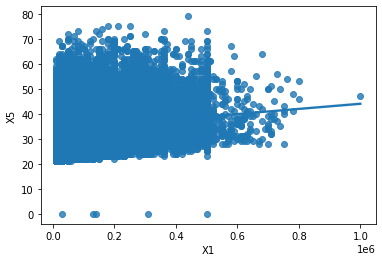

In [217]:
p = sns.regplot(data = df_nulls,  
                x = df_nulls.X1, 
                y = df_nulls.X5
               ) 
p

In [186]:
ndf2 = df_nulls[['X1', 'X5']]
ndf2.corr()

,X1,X5
X1,1.000000,0.144215
X5,0.144215,1.000000


In [187]:
Varience2 = np.cov([df_nulls.X1, df_nulls.X5])
Varience2

array([[1.68344557e+10, 1.72681930e+05],
       [1.72681930e+05, 8.51676347e+01]])

In [188]:
ndf2 = df_nulls[['X1','X5']]
ndf2.var().sum()

16834455767.324924

In [189]:
t2= ndf2.var().sum()
varAmount =Varience2[0][0]
varAge2 = Varience2[1][1]

In [190]:
print('Total Varience \t\t\t:', t2.round(2) )
print('Varience prop. of Amount \t:', ((varAmount/t2)*100).round(2),'%' )
print('Varience prop. of Age    \t:', ((varAge2/t2)*100).round(2),'%' )

Total Varience 			: 16834455767.32
Varience prop. of Amount 	: 100.0 %
Varience prop. of Age    	: 0.0 %


In [191]:
pcs = PCA(n_components=2)

pcs.fit(df_nulls[['X1', 'X5']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,129747.661574,1.000000e+00,1.0
1,9.132159,4.953907e-09,1.0


In [192]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,129747.66,9.13
Proportion of variance,1.00,0.00
Cumulative proportion,1.00,1.00


In [193]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,129747.6616,9.1322
Proportion of variance,1.0000,0.0000
Cumulative proportion,1.0000,1.0000


In [213]:
pca2 = decomposition.PCA(n_components=5)
pc = pca2.fit_transform(df_nulls)

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca2.explained_variance_),
                          'Proportion of variance': pca2.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca2.explained_variance_ratio_),
                          'PC':['PC1','PC2','PC3','PC4','PC5']
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion,PC
0,166526.518601,0.609464,0.609464,PC1
1,115824.404259,0.294837,0.904300,PC2
2,37236.500020,0.030473,0.934774,PC3
3,27730.717840,0.016901,0.951674,PC4
4,20687.732841,0.009406,0.961080,PC5


#### ¿Cuál es el número de componentes mínimo y por qué?

###### El número mínimo es de 2 componentes ya que con eso contamos con el 90% de la varianza de los datos



#### ¿Cuál es la variación de los datos que representan esos componentes?

###### 90.42%

#### ¿Cuál es la pérdida de información después de realizar PCA?

###### 9.58%

#### De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

###### La variable más importante es la del monto del crédito otorgado y la de menor importancia sería la edad




#### ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning? 